In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

# Import our input dataset
attacks_df = pd.read_csv('shark_attacks_cleaned.csv')
attacks_df.head()

,index,Date,Year,Type,Country,Area,Location,Activity,Gender,Age,Fatal,Time,href formula,ISO_code
0,0,9/10/21,2021,NaN,EGYPT,NaN,Sidi Abdel Rahmen,Swimming,M,0,NaN,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,EG
1,1,9/9/21,2021,Unprovoked,USA,Florida,"Ponce Inlet, Volusia County",Surfing and Other Board Sports,M,0,N,13:20:00,http://sharkattackfile.net/spreadsheets/pdf_di...,US
2,2,9/5/21,2021,Unprovoked,AUSTRALIA,New South Wales,Emerald Beach,Surfing and Other Board Sports,M,31,Y,10:30:00,http://sharkattackfile.net/spreadsheets/pdf_di...,AU
3,3,9/3/21,2021,Unprovoked,British Overseas Territory,Turks and Caicos,NaN,Other,M,0,N,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,NaN
4,4,8/28/21,2021,Unprovoked,USA,Texas,"Galveston Island, Galveston County",Surfing and Other Board Sports,M,0,N,11:45:00,http://sharkattackfile.net/spreadsheets/pdf_di...,US


In [5]:
attacks_df.drop(['index', 'Date', 'Time', 'href formula', 'ISO_code'], axis=1, inplace=True)
attacks_df

,Year,Type,Country,Area,Location,Activity,Gender,Age,Fatal
0,2021,NaN,EGYPT,NaN,Sidi Abdel Rahmen,Swimming,M,0,NaN
1,2021,Unprovoked,USA,Florida,"Ponce Inlet, Volusia County",Surfing and Other Board Sports,M,0,N
2,2021,Unprovoked,AUSTRALIA,New South Wales,Emerald Beach,Surfing and Other Board Sports,M,31,Y
3,2021,Unprovoked,British Overseas Territory,Turks and Caicos,NaN,Other,M,0,N
4,2021,Unprovoked,USA,Texas,"Galveston Island, Galveston County",Surfing and Other Board Sports,M,0,N
...,...,...,...,...,...,...,...,...,...
4486,1950,Unprovoked,GREECE,NaN,"Piraeus, Athens",Swimming,NaN,0,Y
4487,1950,Unprovoked,SINGAPORE,Singapore Harbor,NaN,Diving,M,0,Y
4488,1950,Unprovoked,NEW CALEDONIA,North Province,"Voh, near meatworks",Fishing,M,0,N
4489,1950,Unprovoked,NEW CALEDONIA,North Province,Mangalia Reef above Touho,Diving,M,0,N


In [6]:
attacks_df = attacks_df.dropna()
attacks_df

,Year,Type,Country,Area,Location,Activity,Gender,Age,Fatal
1,2021,Unprovoked,USA,Florida,"Ponce Inlet, Volusia County",Surfing and Other Board Sports,M,0,N
2,2021,Unprovoked,AUSTRALIA,New South Wales,Emerald Beach,Surfing and Other Board Sports,M,31,Y
4,2021,Unprovoked,USA,Texas,"Galveston Island, Galveston County",Surfing and Other Board Sports,M,0,N
5,2021,Unprovoked,USA,Louisiana,off Grand Isle,Fishing,M,64,N
6,2021,Unprovoked,USA,Florida,"Walton Beach Psrk, St. Lucie County",Surfing and Other Board Sports,M,41,N
...,...,...,...,...,...,...,...,...,...
4483,1950,Unprovoked,INDONESIA,Jakarta Harbour,On rock near Yacht Club,Other,M,0,Y
4484,1950,Unprovoked,USA,Florida,"Jacksonville Beach, Duval County",Other,M,0,N
4485,1950,Unprovoked,PANAMA,Canal Zone,300 yards west of mouth of the Chagres River,Other,M,0,N
4488,1950,Unprovoked,NEW CALEDONIA,North Province,"Voh, near meatworks",Fishing,M,0,N


In [7]:
# Generate our categorical variable list
attacks_cat = attacks_df.dtypes[attacks_df.dtypes == "object"].index.tolist()

In [8]:
# Check the number of unique values in each column
attacks_df[attacks_cat].nunique()

Type           4
Country      109
Area         461
Location    2700
Activity       9
Gender         3
Fatal          3
dtype: int64

In [9]:
attacks_country_counts = attacks_df.Country.value_counts()
attacks_country_counts

USA                               1799
AUSTRALIA                          714
SOUTH AFRICA                       374
PAPUA NEW GUINEA                    85
BRAZIL                              84
                                  ... 
ST. MAARTIN                          1
SUDAN                                1
FEDERATED STATES OF MICRONESIA       1
SAUDI ARABIA                         1
MONTENEGRO                           1
Name: Country, Length: 109, dtype: int64

<AxesSubplot:ylabel='Density'>

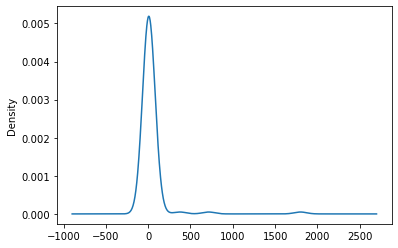

In [10]:
attacks_country_counts.plot.density()

In [12]:
replace_country = list(attacks_country_counts[attacks_country_counts < 40].index)

for country in replace_country:
    attacks_df.Country = attacks_df.Country.replace(country,"Other")
    
attacks_df.Country.value_counts()

/Users/nicolefreeman/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


USA                 1799
AUSTRALIA            714
Other                550
SOUTH AFRICA         374
PAPUA NEW GUINEA      85
BRAZIL                84
NEW ZEALAND           71
BAHAMAS               64
MEXICO                52
Name: Country, dtype: int64

In [14]:
attacks_area_count = attacks_df.Area.value_counts()
attacks_area_count

Florida                 948
California              245
New South Wales         240
Hawaii                  221
Queensland              174
                       ... 
Cook islans               1
Western Luzon Island      1
Mersin Province           1
Gulf of Panama            1
St. Marys Parish          1
Name: Area, Length: 461, dtype: int64

<AxesSubplot:ylabel='Density'>

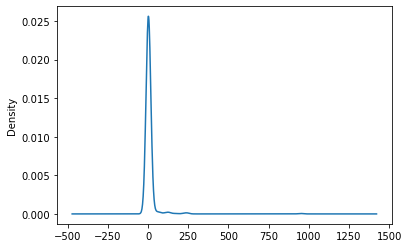

In [15]:
attacks_area_count.plot.density()

In [18]:
replace_area = list(attacks_area_count[attacks_area_count < 110].index)

for area in replace_area:
    attacks_df.Area = attacks_df.Area.replace(area,"Other")
    
attacks_df.Area.value_counts()

/Users/nicolefreeman/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


Other                    1460
Florida                   948
California                245
New South Wales           240
Hawaii                    221
Queensland                174
Western Australia         136
Eastern Cape Province     134
KwaZulu-Natal             118
Western Cape Province     117
Name: Area, dtype: int64

In [19]:
attacks_location_count = attacks_df.Location.value_counts()
attacks_location_count

New Smyrna Beach, Volusia County               179
Daytona Beach, Volusia County                   28
Ponce Inlet, Volusia County                     25
Melbourne Beach, Brevard County                 19
Cocoa Beach, Brevard  County                    16
                                              ... 
Glentana                                         1
Turtle Island                                    1
Dodnduwa                                         1
Off San Clemente Island, Los Angeles County      1
Makaha Beach, Oahu                               1
Name: Location, Length: 2700, dtype: int64

<AxesSubplot:ylabel='Density'>

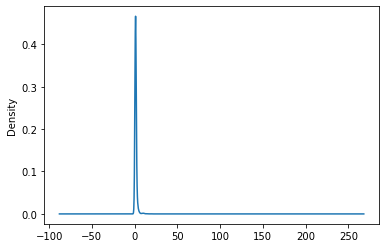

In [20]:
attacks_location_count.plot.density()

In [23]:
replace_location = list(attacks_location_count[attacks_location_count < 12].index)

for location in replace_location:
    attacks_df.Location = attacks_df.Location.replace(location,"Other")
    
attacks_df.Location.value_counts()

/Users/nicolefreeman/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


Other                               3472
New Smyrna Beach, Volusia County     179
Daytona Beach, Volusia County         28
Ponce Inlet, Volusia County           25
Melbourne Beach, Brevard County       19
Cocoa Beach, Brevard  County          16
Myrtle Beach, Horry County            15
Boa Viagem, Recife                    14
Isle of Palms, Charleston County      13
Cocoa Beach, Brevard County           12
Name: Location, dtype: int64

In [24]:
attacks_df[attacks_cat].nunique()

Type         4
Country      9
Area        10
Location    10
Activity     9
Gender       3
Fatal        3
dtype: int64

In [25]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(attacks_df[attacks_cat]))

# Add the encoded variable names to the DataFrame
encode_df.columns = enc.get_feature_names(attacks_cat)
encode_df.head()

,Type_Provoked,Type_Sea Disaster,Type_Unprovoked,Type_Watercraft,Country_AUSTRALIA,Country_BAHAMAS,Country_BRAZIL,Country_MEXICO,Country_NEW ZEALAND,Country_Other,...,Activity_Snorkeling,Activity_Surfing and Other Board Sports,Activity_Swimming,Activity_Wading,Gender_F,Gender_M,Gender_UNKNOWN,Fatal_N,Fatal_UNKNOWN,Fatal_Y
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [26]:
# Merge one-hot encoded features and drop the originals
attacks_df = attacks_df.merge(encode_df,left_index=True, right_index=True)
attacks_df = attacks_df.drop(attacks_cat,1)
attacks_df.head()

,Year,Age,Type_Provoked,Type_Sea Disaster,Type_Unprovoked,Type_Watercraft,Country_AUSTRALIA,Country_BAHAMAS,Country_BRAZIL,Country_MEXICO,...,Activity_Snorkeling,Activity_Surfing and Other Board Sports,Activity_Swimming,Activity_Wading,Gender_F,Gender_M,Gender_UNKNOWN,Fatal_N,Fatal_UNKNOWN,Fatal_Y
1,2021,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,2021,31,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,2021,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
5,2021,64,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
6,2021,41,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [27]:
# Split our preprocessed data into our features and target arrays
y = attacks_df["Fatal_Y"].values
X = attacks_df.drop(["Fatal_N","Fatal_UNKNOWN","Fatal_Y"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [28]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [29]:
# Define the model - deep neural net
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  8
hidden_nodes_layer2 = 5

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 384       
                                                                 
 dense_1 (Dense)             (None, 5)                 45        
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 435
Trainable params: 435
Non-trainable params: 0
_________________________________________________________________


In [30]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [31]:
# Train the model
fit_model = nn.fit(X_train,y_train,epochs=100)

Epoch 1/100
77/77 [==============================] - 1s 2ms/step - loss: 0.6135 - accuracy: 0.8620
Epoch 2/100
77/77 [==============================] - 0s 2ms/step - loss: 0.4110 - accuracy: 0.8620
Epoch 3/100
77/77 [==============================] - 0s 1ms/step - loss: 0.4053 - accuracy: 0.8620
Epoch 4/100
77/77 [==============================] - 0s 1ms/step - loss: 0.4097 - accuracy: 0.8620
Epoch 5/100
77/77 [==============================] - 0s 1ms/step - loss: 0.4146 - accuracy: 0.8620
Epoch 6/100
77/77 [==============================] - 0s 1ms/step - loss: 0.4026 - accuracy: 0.8620
Epoch 7/100
77/77 [==============================] - 0s 1ms/step - loss: 0.4011 - accuracy: 0.8620
Epoch 8/100
77/77 [==============================] - 0s 1ms/step - loss: 0.4007 - accuracy: 0.8620
Epoch 9/100
77/77 [==============================] - 0s 1ms/step - loss: 0.4008 - accuracy: 0.8620
Epoch 10/100
77/77 [==============================] - 0s 2ms/step - loss: 0.3976 - accuracy: 0.8620
Epoch 11/

77/77 [==============================] - 0s 2ms/step - loss: 0.3347 - accuracy: 0.8620
Epoch 83/100
77/77 [==============================] - 0s 1ms/step - loss: 0.3366 - accuracy: 0.8620
Epoch 84/100
77/77 [==============================] - 0s 2ms/step - loss: 0.3346 - accuracy: 0.8620
Epoch 85/100
77/77 [==============================] - 0s 2ms/step - loss: 0.3309 - accuracy: 0.8620
Epoch 86/100
77/77 [==============================] - 0s 2ms/step - loss: 0.3406 - accuracy: 0.8620
Epoch 87/100
77/77 [==============================] - 0s 2ms/step - loss: 0.3304 - accuracy: 0.8620
Epoch 88/100
77/77 [==============================] - 0s 2ms/step - loss: 0.3313 - accuracy: 0.8620
Epoch 89/100
77/77 [==============================] - 0s 2ms/step - loss: 0.3377 - accuracy: 0.8620
Epoch 90/100
77/77 [==============================] - 0s 2ms/step - loss: 0.3344 - accuracy: 0.8620
Epoch 91/100
77/77 [==============================] - 0s 1ms/step - loss: 0.3296 - accuracy: 0.8620
Epoch 92/100


In [32]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

26/26 - 1s - loss: 0.2925 - accuracy: 0.8747 - 518ms/epoch - 20ms/step
Loss: 0.29248130321502686, Accuracy: 0.8746928572654724
